In [14]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg   # https://pingouin-stats.org/build/html/index.html  usede for calculation of cronbach_alpha

In [15]:
df= pd.read_csv("Airline_Passenger_Satisfaction_train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [17]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

---
### Correlation Visualization
A quick look at the correlation matrix suggest there are underlying factors.  In particular it looks like there may be underlying factors with these variables.

* Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, and Gate location are correlated.
* Food and drink, Online boarding, Seat comfort, Inflight entertainment, and cleanliness
* Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, and Inflight service

C:\Users\jspinega\AppData\Local\Temp\ipykernel_15664\2369852186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


<AxesSubplot: >

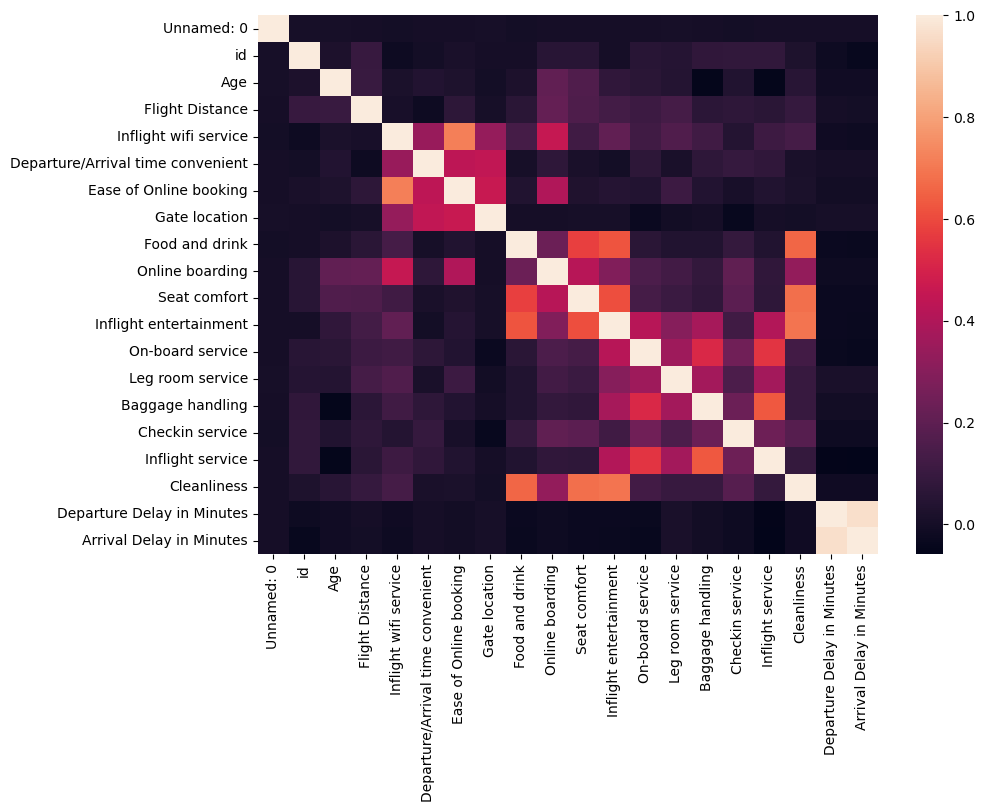

In [18]:
plt.figure(figsize=(10,7))
c= df.corr()
sns.heatmap(c)

In [19]:
# Extreamly high coorilation between “Departure Delay in Minutes” and the “Arrival Delay in Minutes” suggest that they are actually measuring the same thing.
# So, we drop one of these varaiables.
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [20]:
x = pd.get_dummies(df)

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [21]:
# the results of this test suggest FA is not appropriate for this data set.  Some variable should be eliminated. 
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

c:\Users\jspinega\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [22]:
kmo_all,kmo_model=calculate_kmo(x)
kmo_model

c:\Users\jspinega\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6690245865307878

In [23]:
# Standardization has no impact on the results, however I am leaving it for completness
variables = x.columns.tolist()
# should standarize
scaler = StandardScaler().fit(x)

# use the scaler to transform my training data
x = scaler.transform(x)

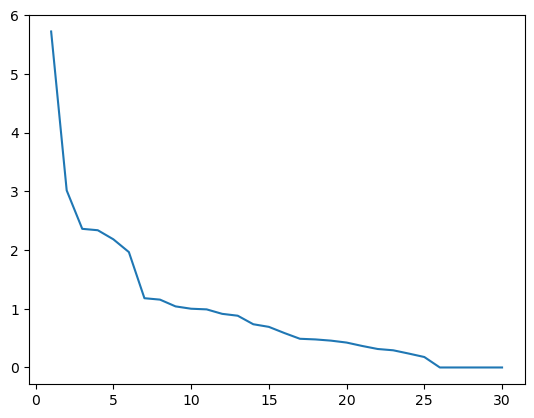

In [24]:
# Perform the factor analysis
fa = FactorAnalyzer()
fa.fit(x, 10)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

We will only use 6 factors here, given the big dropoff in eigenvalue after the 3rd factor.

In [25]:
fa = FactorAnalyzer(6, rotation='varimax')
fa.fit(x)
# loads = fa.loadings_
# print(loads)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [26]:
# variables = x.columns.tolist()

loads = fa.loadings_                                # get the factor loadings
loads = pd.DataFrame(loads)                         # bring them into a data frame
factor_head = []                                    # create an empty variable for collecting headings

for f in range(1, loads.shape[1]+1):                # create a Factor x for each factor where x is 1, 2, ... 
    factor_head.append('Factor_'+str(f))

loads.columns = factor_head                         # add the factor heads to the loads data frame
loads['variables'] = variables                      # add the variable names to the loads data frame
loads.set_index('variables', inplace=True)          # set the variables as the index
loads.style.highlight_max(color = 'darkgreen', axis = 0)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
variables,,,,,,
Unnamed: 0,-0.000526,-0.001609,-0.000274,0.002794,0.001025,0.004104
id,0.044331,-0.003053,0.088577,0.020409,-0.014338,-0.003843
Age,0.145326,0.073663,-0.015866,0.285373,0.021022,0.008726
Flight Distance,0.425421,0.038569,0.098620,0.237498,-0.018058,0.003353
Inflight wifi service,0.102457,0.157633,0.119312,-0.032070,0.771788,0.009824
Departure/Arrival time convenient,-0.224013,-0.022346,0.084167,0.189075,0.537253,0.022181
Ease of Online booking,0.148183,-0.001972,0.005317,-0.006615,0.898235,0.016245
Gate location,-0.016582,-0.031409,-0.034210,-0.023809,0.506894,0.012073
Food and drink,0.028162,0.762954,0.013524,-0.001774,0.017536,-0.006907


<AxesSubplot: >

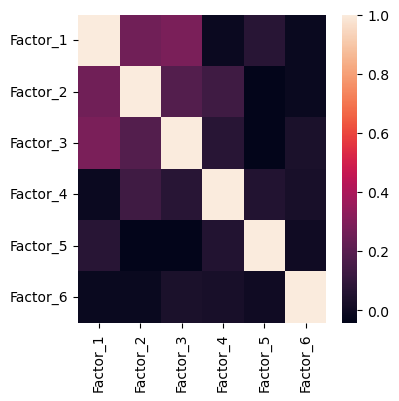

In [27]:
plt.figure(figsize=(4,4))
c= loads.corr()
sns.heatmap(c)

In [28]:
# define a function that will identify the highest loading variable on each factor.

# Argurments 
#     (1) the dataframe containing the loads 
#     (2) the factor name
#     (3) the number of variable loading you want to see

def factor_loading (loads_df, factor_name, n):
      factor_df = loads_df[factor_name]
      factor_df_as = factor_df.iloc[loads_df[factor_name].abs().argsort()][::-1]
      print('-----------   ', factor_name, '   -------------------------')
      print(factor_df_as.head(n))
      return factor_df_as

In [29]:
for f in factor_head:
      f = factor_loading(loads, f, 10)

-----------    Factor_1    -------------------------
variables
Type of Travel_Personal Travel         -0.854477
Type of Travel_Business travel          0.854477
Class_Business                          0.774741
Class_Eco                              -0.702674
satisfaction_satisfied                  0.634877
satisfaction_neutral or dissatisfied   -0.634877
Flight Distance                         0.425421
Online boarding                         0.375333
Departure/Arrival time convenient      -0.224013
Seat comfort                            0.177507
Name: Factor_1, dtype: float64
-----------    Factor_2    -------------------------
variables
Cleanliness                             0.854925
Food and drink                          0.762954
Seat comfort                            0.753440
Inflight entertainment                  0.736049
Online boarding                         0.340764
satisfaction_satisfied                  0.281366
satisfaction_neutral or dissatisfied   -0.281366
Inflight w

In [30]:
# Get variance of each factors
Factor_Variance = fa.get_factor_variance()
print(f'SS Loadings: {Factor_Variance[0]}')
print(f'Proportiion Var: {Factor_Variance[1]}')
print(f'Cumulative Var: {Factor_Variance[2]}')

SS Loadings: [3.88905562 2.77299761 2.63607431 2.46638356 2.12248248 2.0050212 ]
Proportiion Var: [0.12963519 0.09243325 0.08786914 0.08221279 0.07074942 0.06683404]
Cumulative Var: [0.12963519 0.22206844 0.30993758 0.39215037 0.46289979 0.52973383]


---
The other file Airline_Passenger_Satisfaction_FA continues beyond here.  Creating the factors and building a dataframe based on the factors.